In [1]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [1]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
from mtcnn.mtcnn import MTCNN
detector=MTCNN()

In [3]:
import numpy as np
class FACELOADING:
    def __init__(self,directory):
        self.directory=directory
        self.target_size=(160,160)
        self.X=[]
        self.Y=[]
        self.detector=MTCNN()
    def extract_face(self,filename):
        img=cv.imread(filename)
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
        x,y,w,h=self.detector.detect_faces(img)[0]['box']
        x,y=abs(x),abs(y)
        face=img[y:y+h,x:x+w]
        face_arr=cv.resize(face,self.target_size)
        return face_arr
    def load_faces(self,dir):
        FACES=[]
        for im_name in os.listdir(dir):
            try:
                path=dir+im_name
                single_face=self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES
    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path=self.directory+'/'+sub_dir+'/'
            FACES=self.load_faces(path)
            labels=[sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)

In [4]:
faceloading=FACELOADING("C:\\Users\\new\\Desktop\\ProjectK\\images")
X,Y=faceloading.load_classes()

1/1 [==============================] - 0s 36ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 186ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 49ms/step
Loaded successfully: 12
1/1 [==============================] - 0s 35ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 42ms/step
Loaded successfully: 3
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 57ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 42ms/step


4/4 [==============================] - 0s 48ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 30ms/step
Loaded successfully: 3
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 47ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 47ms/step
Loaded successfully: 12
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 42ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 42ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 43ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 32ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 79ms/step


2/2 [==============================] - 0s 12ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 70ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 57ms/step


2/2 [==============================] - 0s 54ms/step
Loaded successfully: 16
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 39ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 48ms/step
Loaded successfully: 10


In [5]:
len(X)

169

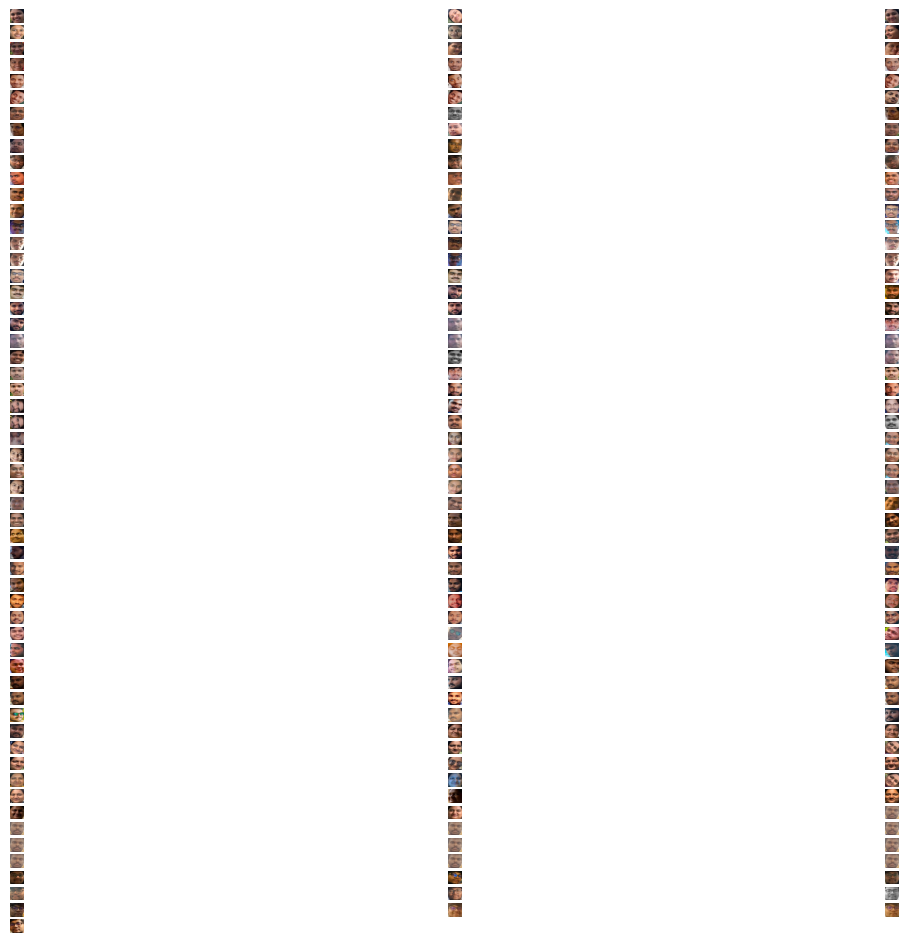

In [6]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols=3
    nrows=len(Y)//ncols+1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [7]:
from keras_facenet import FaceNet
embedder=FaceNet()
def get_embedding(face_img):
    face_img=face_img.astype('float32')#3d(160X160X3)
    face_img=np.expand_dims(face_img,axis=0)#4d(noneX160X160X3)
    yhat=embedder.embeddings(face_img)
    #print(yhat)
    return yhat[0]

In [8]:
EMBEDDED_X=[]
for img in X:
    EMBEDDED_X.append(get_embedding(img))
EMBEDDED_X=np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 127ms/step


In [9]:
Y

array(['Amalodbavi', 'Amalodbavi', 'Amalodbavi', 'Amalodbavi',
       'Amalodbavi', 'Amalodbavi', 'Amalodbavi', 'Amalodbavi',
       'Amalodbavi', 'Amalodbavi', 'Ashok22', 'Ashok22', 'Ashok22',
       'Ashok22', 'Ashok22', 'Ashok22', 'Ashok22', 'Ashok22', 'Ashok22',
       'Ashok22', 'Ashok22', 'Ashok22', 'Baala', 'Baala', 'Baala',
       'Baala', 'Baala', 'Hemanth', 'Hemanth', 'Hemanth',
       'HemantNarayana', 'HemantNarayana', 'HemantNarayana',
       'HemantNarayana', 'HemantNarayana', 'HemantNarayana',
       'HemantNarayana', 'HemantNarayana', 'JaiRam20KT1A4254',
       'JaiRam20KT1A4254', 'JaiRam20KT1A4254', 'JaiRam20KT1A4254',
       'JaiRam20KT1A4254', 'JaiRam20KT1A4254', 'JaiRam20KT1A4254',
       'JaiRam20KT1A4254', 'JaiRam20KT1A4254', 'JaiRam20KT1A4254',
       'JaiRam20KT1A4254', 'Jignash_20kt1a4210', 'Jignash_20kt1a4210',
       'Jignash_20kt1a4210', 'Lokesh', 'Lokesh', 'Lokesh', 'Lokesh',
       'Lokesh', 'Lokesh', 'Manoj06', 'Manoj06', 'Manoj06', 'Manoj06',
       'Man

In [10]:
np.savez_compressed('face_moham_viluvalu.npz',EMBEDDED_X,Y)

In [11]:
###SVM model

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)

In [13]:
Y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  4,  4,  4,  3,  3,  3,  3,
        3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(EMBEDDED_X,Y,shuffle=True,random_state=7)

In [15]:
from sklearn.svm import SVC
model=SVC(kernel='linear',probability=True)
model.fit(X_train,Y_train)

SVC(kernel='linear', probability=True)

In [16]:
ypreds_train=model.predict(X_train)
ypreds_test=model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,ypreds_train)

0.9841269841269841

In [18]:
accuracy_score(Y_test,ypreds_test)

0.9534883720930233

In [19]:
tim=cv.imread('C:\\Users\\new\\Desktop\\ProjectK\\Images\\yasvanth\\p1.jpg')
tim=cv.cvtColor(tim,cv.COLOR_BGR2RGB)
x,y,w,h=detector.detect_faces(tim)[0]['box']
#r=detector.detect_faces(tim)
#r

tim=tim[y:y+h,x:x+w]
tim=cv.resize(tim,(160,160))
test_im=get_embedding(tim)
test_im=[test_im]
ypreds=model.predict(test_im)
print(ypreds)
encoder.inverse_transform(ypreds)
#Y
#set(Y)

1/1 [==============================] - 0s 135ms/step
[18]


array(['Yasvanth'], dtype='<U22')

In [20]:
from joblib import dump,load
dump(model,'na_svm_model.joblib')

['na_svm_model.joblib']